<a href="https://colab.research.google.com/github/sgsakpal/roborocks/blob/master/Copy_of_PuneData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SALES_BOOKING_DETAIL_REPORT_PWC_AA (1).csv to SALES_BOOKING_DETAIL_REPORT_PWC_AA (1) (2).csv


In [ ]:
import pandas as pd
df = pd.read_csv('SALES_BOOKING_DETAIL_REPORT_PWC_AA (1).csv')
 # Replace with your actual filename

In [ ]:
df.head()         # View first few rows
df.info()         # Check column types and missing values
df.describe()     # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626 entries, 0 to 5625
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PROJECTNAME       5626 non-null   object 
 1   SUBPROJECTNAME    5626 non-null   object 
 2   UNITNO            5626 non-null   object 
 3   SALESCUSTOMER     5626 non-null   object 
 4   CUSTMOBILE        5626 non-null   object 
 5   CUSTEMAILS        5626 non-null   object 
 6   BOOKINGDATE2      5626 non-null   object 
 7   LEAD_CREATED_DT   5626 non-null   object 
 8   Textbox53         5626 non-null   object 
 9   BOOKINGTHROUGH1   5626 non-null   object 
 10  ACCOUNTSUBSOURCE  1482 non-null   object 
 11  ACCOUNTSOURCE     5626 non-null   object 
 12  BOOKINGTHROUGH    5626 non-null   object 
 13  Ref_Name          963 non-null    object 
 14  LEADTYPE          776 non-null    object 
 15  BOOKEDBYNAME1     5626 non-null   object 
 16  AGENT             2974 non-null   object 


,TERRACEAREA,AGREEMENTVALUE
count,5626.000000,5626.0
mean,14.468329,0.0
std,25.849247,0.0
min,0.000000,0.0
25%,0.000000,0.0
50%,0.000000,0.0
75%,38.000000,0.0
max,313.520000,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626 entries, 0 to 5625
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PROJECTNAME       5626 non-null   object 
 1   SUBPROJECTNAME    5626 non-null   object 
 2   UNITNO            5626 non-null   object 
 3   SALESCUSTOMER     5626 non-null   object 
 4   CUSTMOBILE        5626 non-null   object 
 5   CUSTEMAILS        5626 non-null   object 
 6   BOOKINGDATE2      5626 non-null   object 
 7   LEAD_CREATED_DT   5626 non-null   object 
 8   Textbox53         5626 non-null   object 
 9   BOOKINGTHROUGH1   5626 non-null   object 
 10  ACCOUNTSUBSOURCE  1482 non-null   object 
 11  ACCOUNTSOURCE     5626 non-null   object 
 12  BOOKINGTHROUGH    5626 non-null   object 
 13  Ref_Name          963 non-null    object 
 14  LEADTYPE          776 non-null    object 
 15  BOOKEDBYNAME1     5626 non-null   object 
 16  AGENT             2974 non-null   object 


In [ ]:
cols_to_convert = ['UNITAREA', 'GARDENAREA', 'BASERATE', 'BASECOST', 'OTHERCHARGES',
                   'AGREEMENTVALUE2', 'NETEXCESS_AMT', 'TOTALAMTRECD', 'OUTSTAMT']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col].str.replace(',', '').str.strip(), errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626 entries, 0 to 5625
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PROJECTNAME       5626 non-null   object 
 1   SUBPROJECTNAME    5626 non-null   object 
 2   UNITNO            5626 non-null   object 
 3   SALESCUSTOMER     5626 non-null   object 
 4   CUSTMOBILE        5626 non-null   object 
 5   CUSTEMAILS        5626 non-null   object 
 6   BOOKINGDATE2      5626 non-null   object 
 7   LEAD_CREATED_DT   5626 non-null   object 
 8   Textbox53         5626 non-null   object 
 9   BOOKINGTHROUGH1   5626 non-null   object 
 10  ACCOUNTSUBSOURCE  1482 non-null   object 
 11  ACCOUNTSOURCE     5626 non-null   object 
 12  BOOKINGTHROUGH    5626 non-null   object 
 13  Ref_Name          963 non-null    object 
 14  LEADTYPE          776 non-null    object 
 15  BOOKEDBYNAME1     5626 non-null   object 
 16  AGENT             2974 non-null   object 


In [ ]:
features = ['UNITAREA', 'GARDENAREA', 'TERRACEAREA', 'BASERATE', 'BASECOST',
            'OTHERCHARGES', 'AGENT', 'ACCOUNTSOURCE', 'BOOKINGTHROUGH']

X = df[features]
y = df['AGREEMENTVALUE2']


In [ ]:
X = X.fillna(0)  # Or use smarter imputation if needed


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numerical_features = ['UNITAREA', 'GARDENAREA', 'TERRACEAREA', 'BASERATE', 'BASECOST', 'OTHERCHARGES']
categorical_features = ['AGENT', 'ACCOUNTSOURCE', 'BOOKINGTHROUGH']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep other columns if any
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features and target
X = df[numerical_features + categorical_features].copy() # Create a copy to avoid SettingWithCopyWarning
y = df['AGREEMENTVALUE2'].copy() # Create a copy

# Convert categorical columns to string type
for col in categorical_features:
    X[col] = X[col].astype(str)

# Handle missing values
X = X.fillna(0)
y = y.fillna(0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build pipeline
model = Pipeline([
    ('prep', preprocessor),
    ('reg', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train model
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['UNITAREA', 'GARDENAREA',
                                                   'TERRACEAREA', 'BASERATE',
                                                   'BASECOST',
                                                   'OTHERCHARGES']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['AGENT', 'ACCOUNTSOURCE',
                                                   'BOOKINGTHROUGH'])])),
                ('reg', RandomForestRegressor(random_state=42))])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 67954576409.48102
R-squared: 0.9945791928956605


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features and target
X = df[numerical_features + categorical_features].copy() # Create a copy to avoid SettingWithCopyWarning
y = df['AGREEMENTVALUE2'].copy() # Create a copy

# Convert categorical columns to string type
for col in categorical_features:
    X[col] = X[col].astype(str)

# Handle missing values
X = X.fillna(0)
y = y.fillna(0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build pipeline
model = Pipeline([
    ('prep', preprocessor),
    ('reg', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train model
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['UNITAREA', 'GARDENAREA',
                                                   'TERRACEAREA', 'BASERATE',
                                                   'BASECOST',
                                                   'OTHERCHARGES']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['AGENT', 'ACCOUNTSOURCE',
                                                   'BOOKINGTHROUGH'])])),
                ('reg', RandomForestRegressor(random_state=42))])

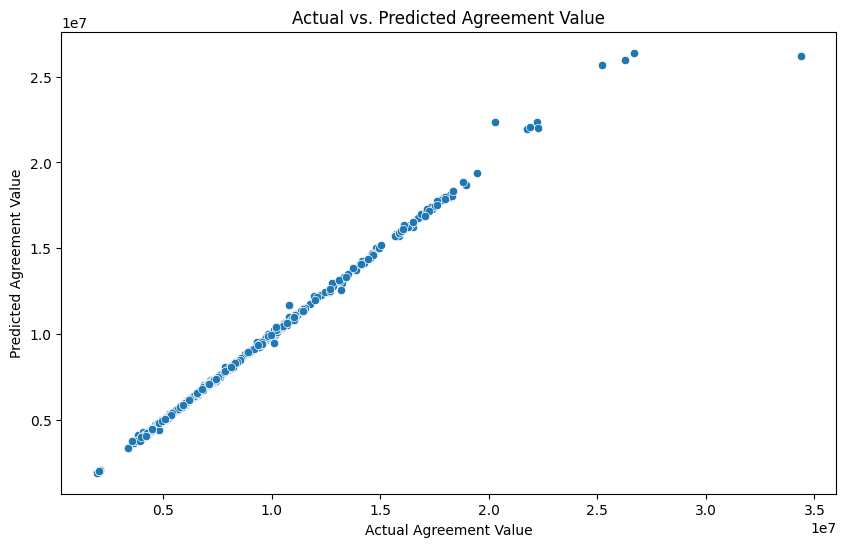

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Agreement Value")
plt.ylabel("Predicted Agreement Value")
plt.title("Actual vs. Predicted Agreement Value")
plt.show()

/tmp/ipython-input-1065582076.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['BOOKINGDATE2'] = pd.to_datetime(df['BOOKINGDATE2'], errors='coerce')


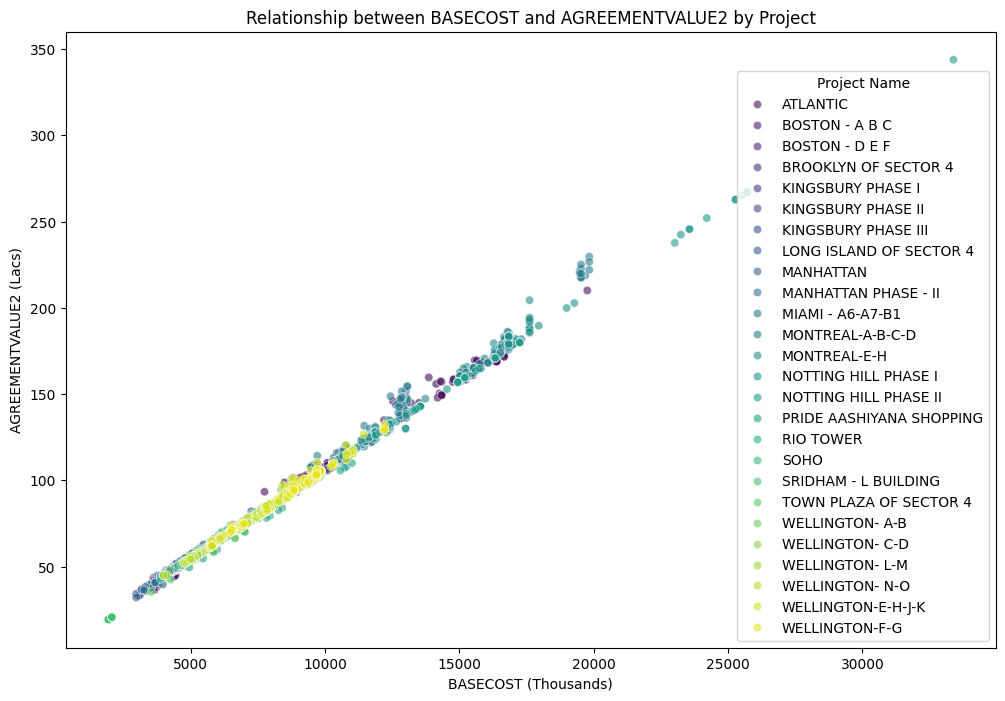

In [ ]:
# Convert 'BOOKINGDATE2' to datetime objects and extract the year
df['BOOKINGDATE2'] = pd.to_datetime(df['BOOKINGDATE2'], errors='coerce')
df['Booking_Year'] = df['BOOKINGDATE2'].dt.year

# Scale BASECOST to thousands and AGREEMENTVALUE2 to lacs
df['BASECOST_thousands'] = df['BASECOST'] / 1000
df['AGREEMENTVALUE2_lacs'] = df['AGREEMENTVALUE2'] / 100000

# Create a scatter plot of scaled BASECOST vs scaled AGREEMENTVALUE2, colored by project
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['BASECOST_thousands'], y=df['AGREEMENTVALUE2_lacs'], hue=df['PROJECTNAME'], palette='viridis', alpha=0.6)
plt.xlabel("BASECOST (Thousands)")
plt.ylabel("AGREEMENTVALUE2 (Lacs)")
plt.title("Relationship between BASECOST and AGREEMENTVALUE2 by Project")
plt.legend(title='Project Name')
plt.show()

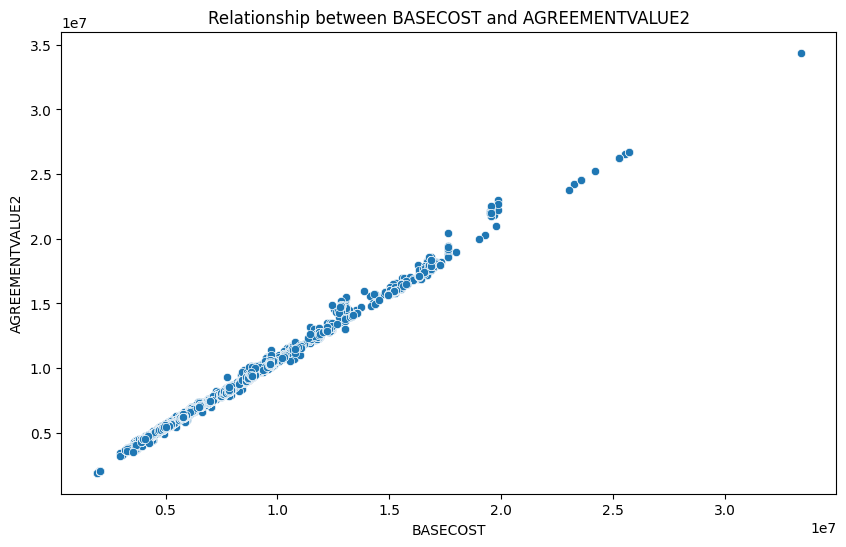

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['BASECOST'], y=df['AGREEMENTVALUE2'])
plt.xlabel("BASECOST")
plt.ylabel("AGREEMENTVALUE2")
plt.title("Relationship between BASECOST and AGREEMENTVALUE2")
plt.show()

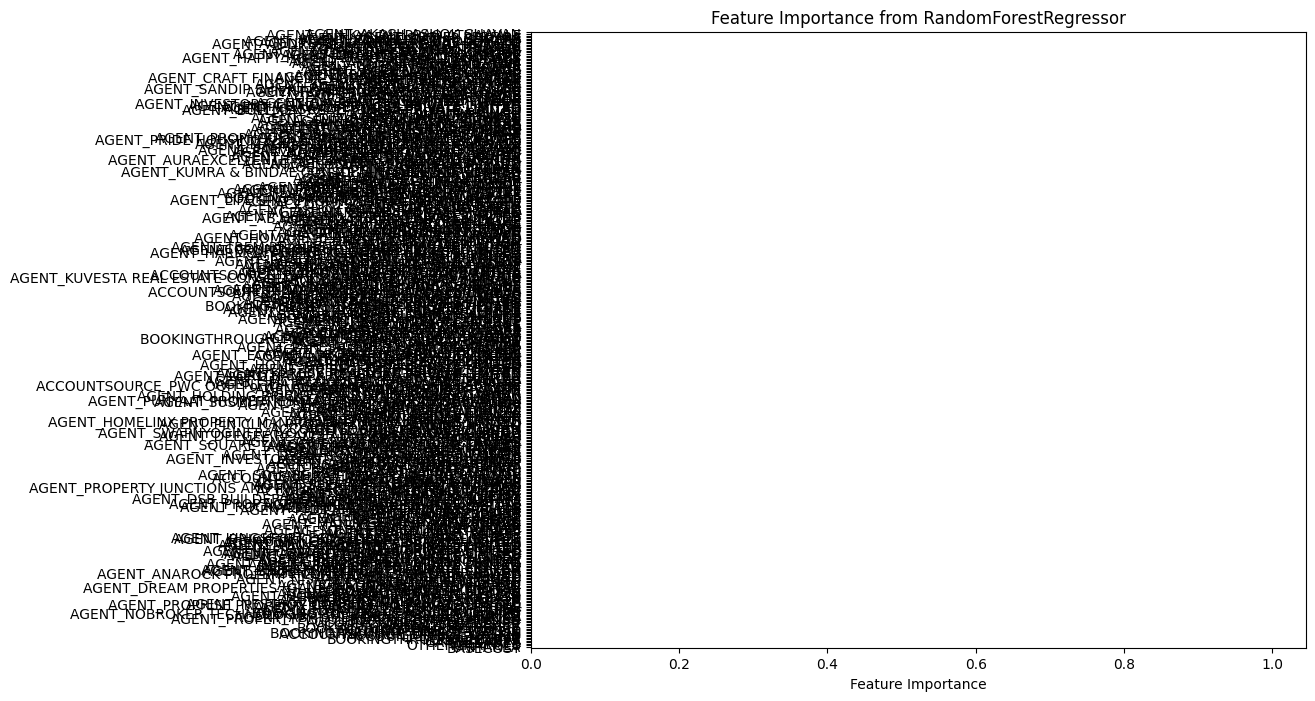

In [ ]:
# Get feature importances from the trained model
feature_importances = model.named_steps['reg'].feature_importances_

# Get feature names after one-hot encoding
# This requires accessing the categories from the OneHotEncoder
onehot_encoder = model.named_steps['prep'].transformers_[1][1]
feature_names = numerical_features + list(onehot_encoder.get_feature_names_out(categorical_features))

# Create a pandas Series for better visualization
importance_series = pd.Series(feature_importances, index=feature_names)

# Sort feature importances and plot
plt.figure(figsize=(10, 8))
importance_series.sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from RandomForestRegressor')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 67954576409.48102
R-squared: 0.9945791928956605


In [6]:
import joblib

# Save the trained pipeline
joblib.dump(model, 'Pune_price_model.pkl')

NameError: name 'model' is not defined

In [7]:
from google.colab import files
files.download('Pune_price_model.pkl')


FileNotFoundError: Cannot find file: Pune_price_model.pkl

In [8]:
import streamlit as st
import pandas as pd
import joblib

# Load model
model = joblib.load('Pune_price_model.pkl')

st.title("🏠 Property Price Predictor")

# User inputs
unitarea = st.number_input("Unit Area (sqft)", min_value=100)
gardenarea = st.number_input("Garden Area", min_value=0)
terracearea = st.number_input("Terrace Area", min_value=0)
baserate = st.number_input("Base Rate", min_value=1000)
basecost = st.number_input("Base Cost", min_value=100000)
othercharges = st.number_input("Other Charges", min_value=0)
agent = st.text_input("Agent Name")
accountsource = st.text_input("Account Source")
bookingthrough = st.text_input("Booking Through")

# Predict
if st.button("Predict Price"):
    input_df = pd.DataFrame([{
        'UNITAREA': unitarea,
        'GARDENAREA': gardenarea,
        'TERRACEAREA': terracearea,
        'BASERATE': baserate,
        'BASECOST': basecost,
        'OTHERCHARGES': othercharges,
        'AGENT': agent,
        'ACCOUNTSOURCE': accountsource,
        'BOOKINGTHROUGH': bookingthrough
    }])
    price = model.predict(input_df)[0]
    st.success(f"Estimated Agreement Value: ₹{price:,.2f}")


FileNotFoundError: [Errno 2] No such file or directory: 'Pune_price_model.pkl'

## Arrange visualizations into dashboards

### Subtask:
Combine the individual plots into a dashboard layout using appropriate visualization libraries or tools (although directly creating interactive dashboards in Colab can be limited, we can generate the code for multiple static plots).

**Reasoning**:
Group the previously generated plots into logical dashboards using subplots, adding titles for each dashboard and individual plots, and then display each dashboard.

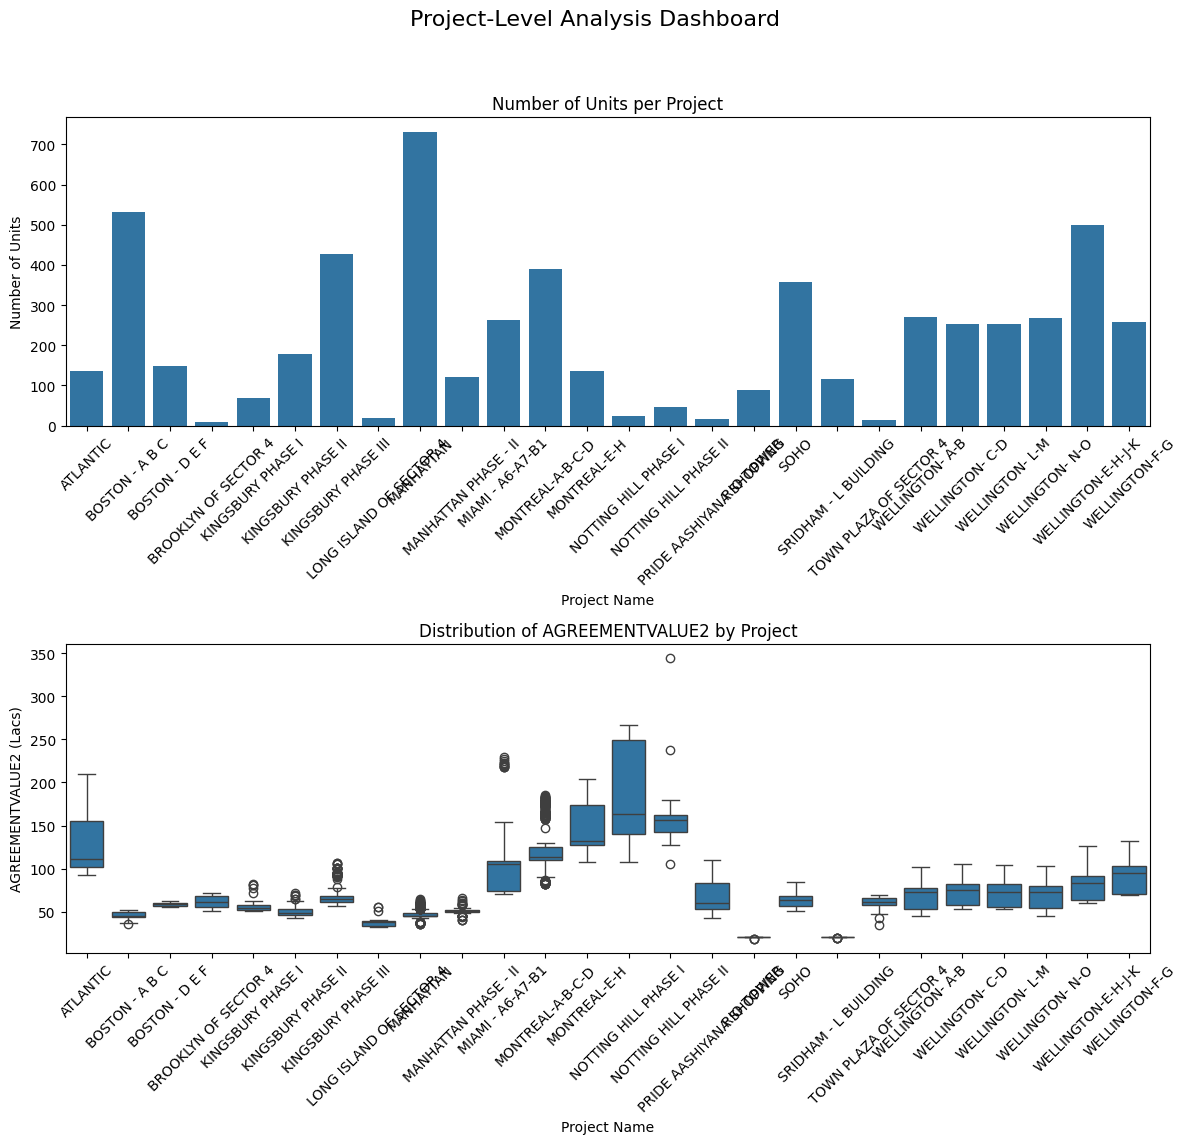

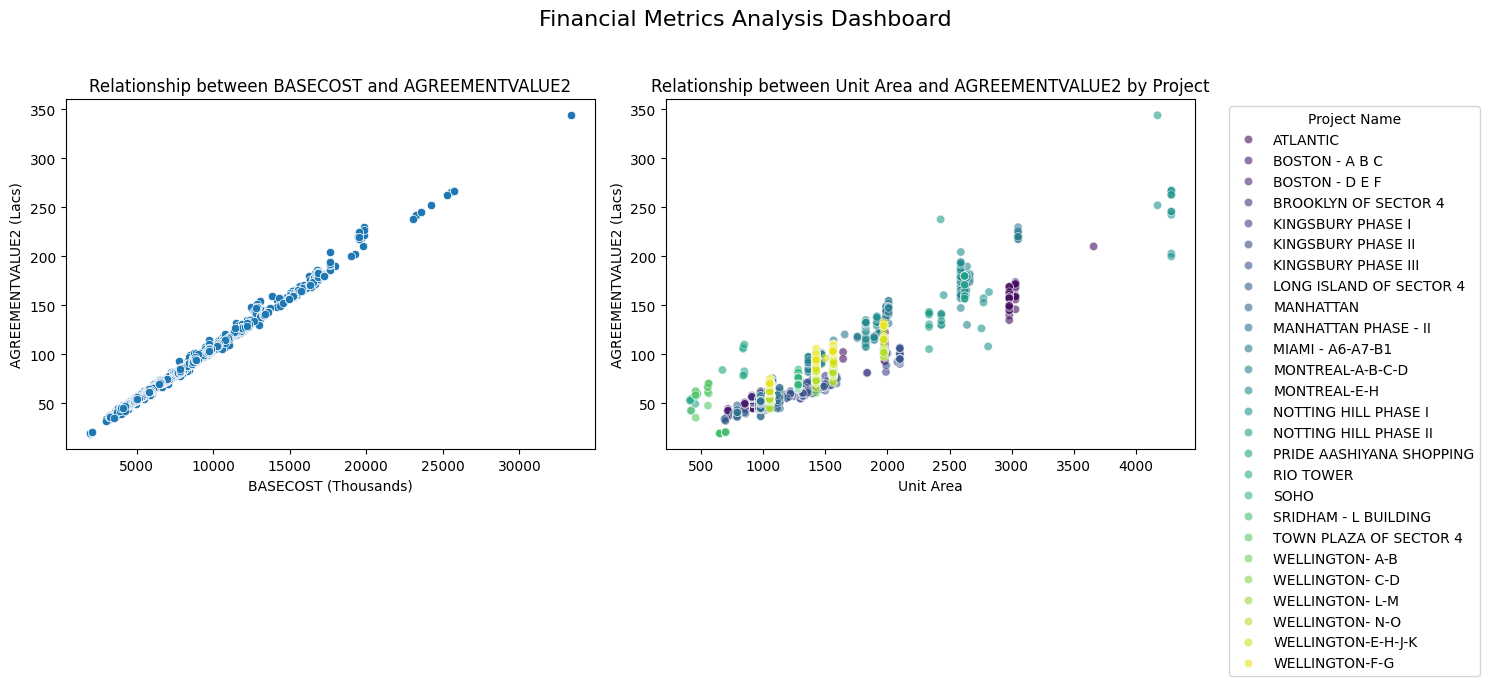

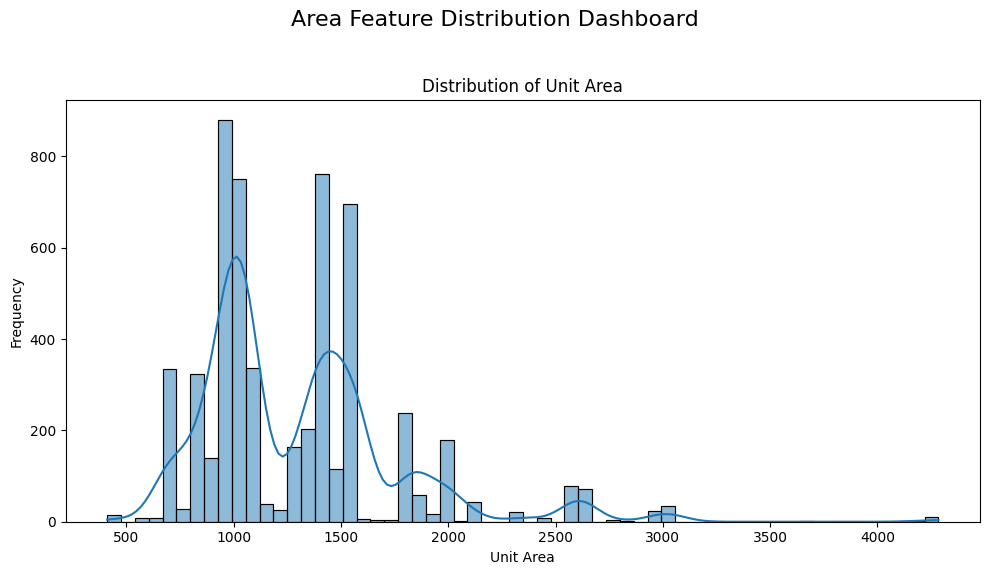

In [ ]:
# Conceptual Dashboard 1: Project-Level Analysis
fig1, axes1 = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
fig1.suptitle('Project-Level Analysis Dashboard', fontsize=16)

# Plot 1: Bar plot for unit count per PROJECTNAME
sns.countplot(data=df_dashboard, x='PROJECTNAME', ax=axes1[0])
axes1[0].set_xlabel('Project Name')
axes1[0].set_ylabel('Number of Units')
axes1[0].set_title('Number of Units per Project')
axes1[0].tick_params(axis='x', rotation=45)


# Plot 4: Box plot for AGREEMENTVALUE2_lacs across different PROJECTNAME
sns.boxplot(data=df_dashboard, x='PROJECTNAME', y='AGREEMENTVALUE2_lacs', ax=axes1[1])
axes1[1].set_xlabel('Project Name')
axes1[1].set_ylabel('AGREEMENTVALUE2 (Lacs)')
axes1[1].set_title('Distribution of AGREEMENTVALUE2 by Project')
axes1[1].tick_params(axis='x', rotation=45)


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

# Conceptual Dashboard 2: Financial Metrics Analysis
fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig2.suptitle('Financial Metrics Analysis Dashboard', fontsize=16)

# Plot 3: Scatter plot for scaled BASECOST vs scaled AGREEMENTVALUE2
sns.scatterplot(data=df_dashboard, x='BASECOST_thousands', y='AGREEMENTVALUE2_lacs', ax=axes2[0])
axes2[0].set_xlabel('BASECOST (Thousands)')
axes2[0].set_ylabel('AGREEMENTVALUE2 (Lacs)')
axes2[0].set_title('Relationship between BASECOST and AGREEMENTVALUE2')

# Plot 5: Scatter plot for UNITAREA vs AGREEMENTVALUE2_lacs colored by PROJECTNAME
sns.scatterplot(data=df_dashboard, x='UNITAREA', y='AGREEMENTVALUE2_lacs', hue='PROJECTNAME', palette='viridis', alpha=0.6, ax=axes2[1])
axes2[1].set_xlabel('Unit Area')
axes2[1].set_ylabel('AGREEMENTVALUE2 (Lacs)')
axes2[1].set_title('Relationship between Unit Area and AGREEMENTVALUE2 by Project')
axes2[1].legend(title='Project Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

# Conceptual Dashboard 3: Area Feature Distribution
fig3, axes3 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
fig3.suptitle('Area Feature Distribution Dashboard', fontsize=16)

# Plot 2: Histogram for UNITAREA distribution
sns.histplot(data=df_dashboard, x='UNITAREA', kde=True, ax=axes3)
axes3.set_xlabel('Unit Area')
axes3.set_ylabel('Frequency')
axes3.set_title('Distribution of Unit Area')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

## Create visualizations

### Subtask:
Generate a series of plots to show trends and relationships for the selected metrics and dimensions. This could include:
- Bar plots or count plots for categorical variables (PROJECTNAME, UNITNO/type).
- Histograms or box plots for numerical variables (area features, AGREEMENTVALUE2, BASECOST).
- Scatter plots or line plots to show relationships and trends over time or between variables, potentially faceted by project or unit type.

**Reasoning**:
Generate the requested plots to visualize the data distribution and relationships between variables.

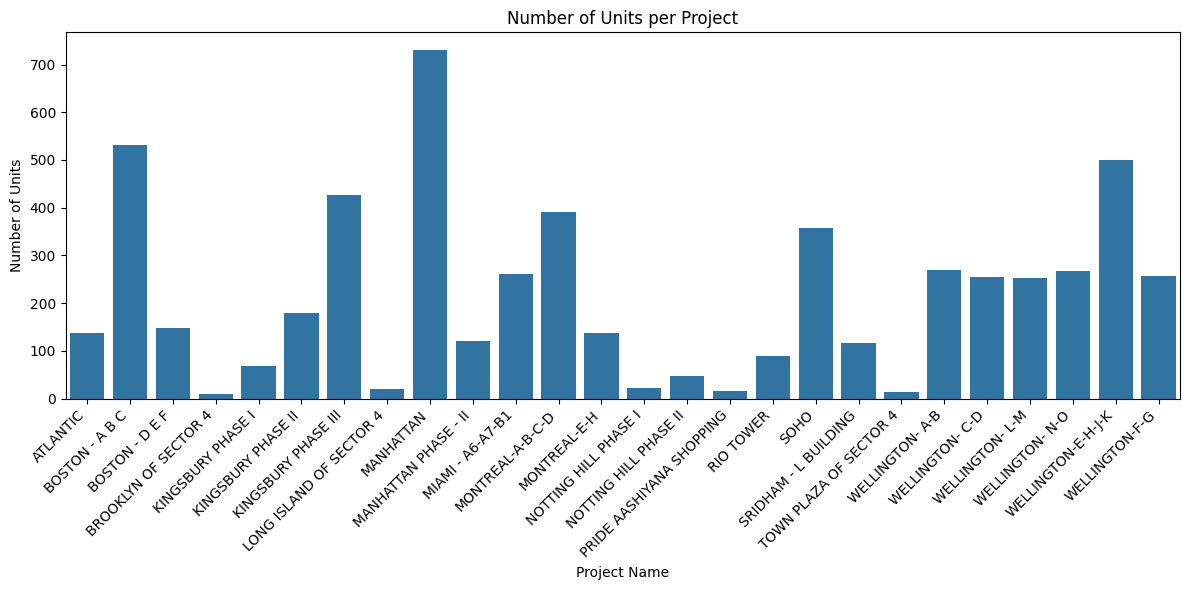

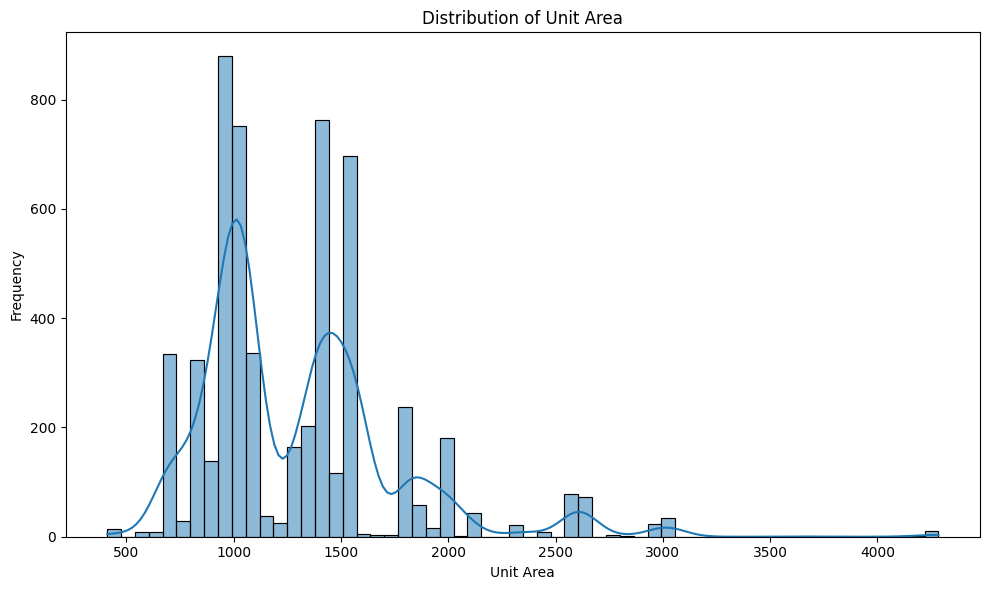

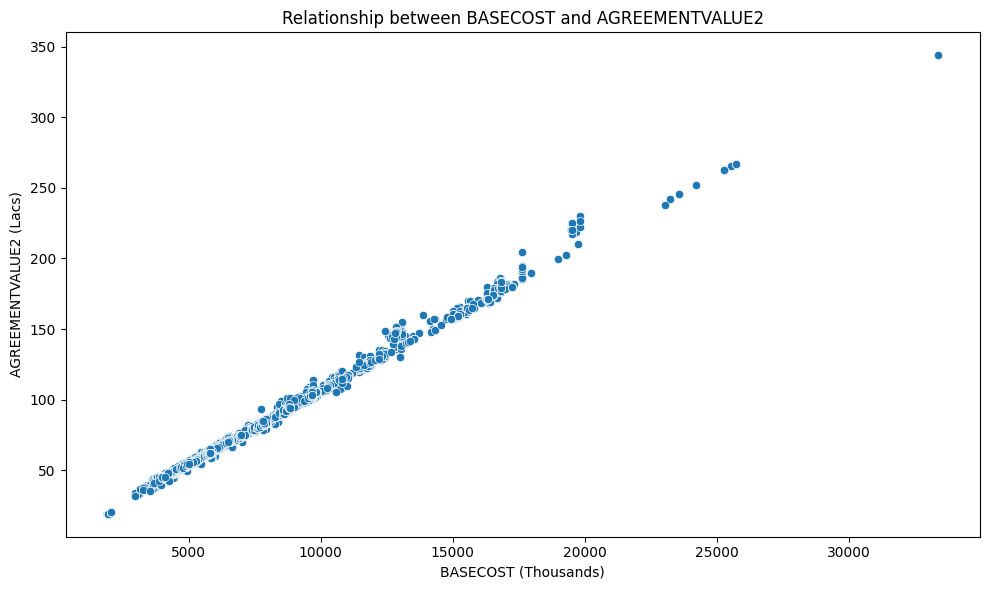

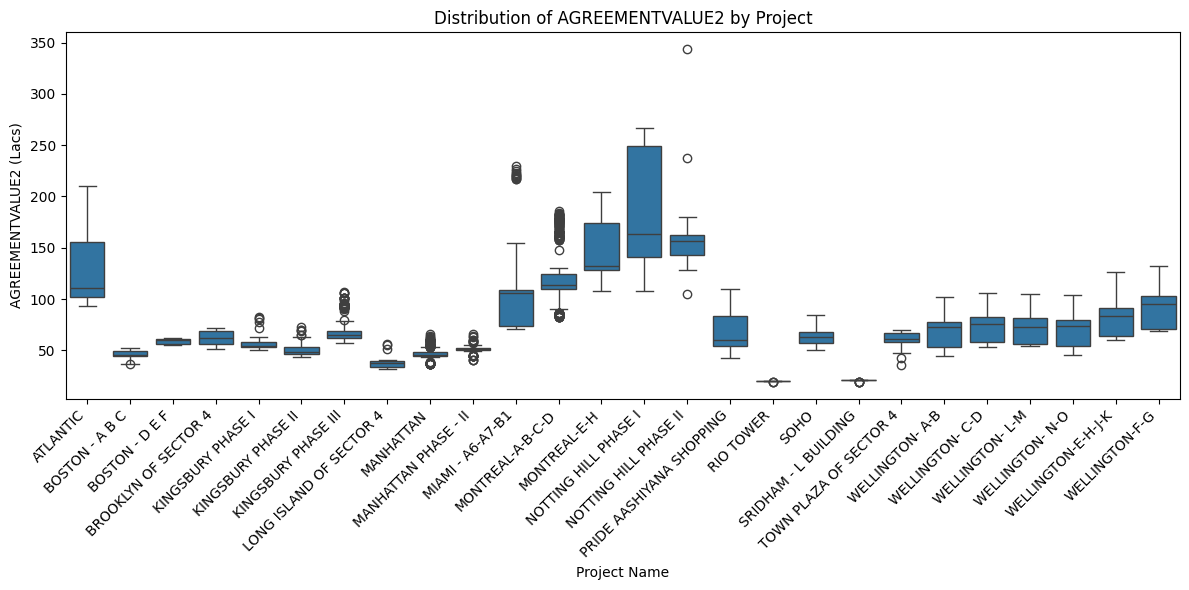

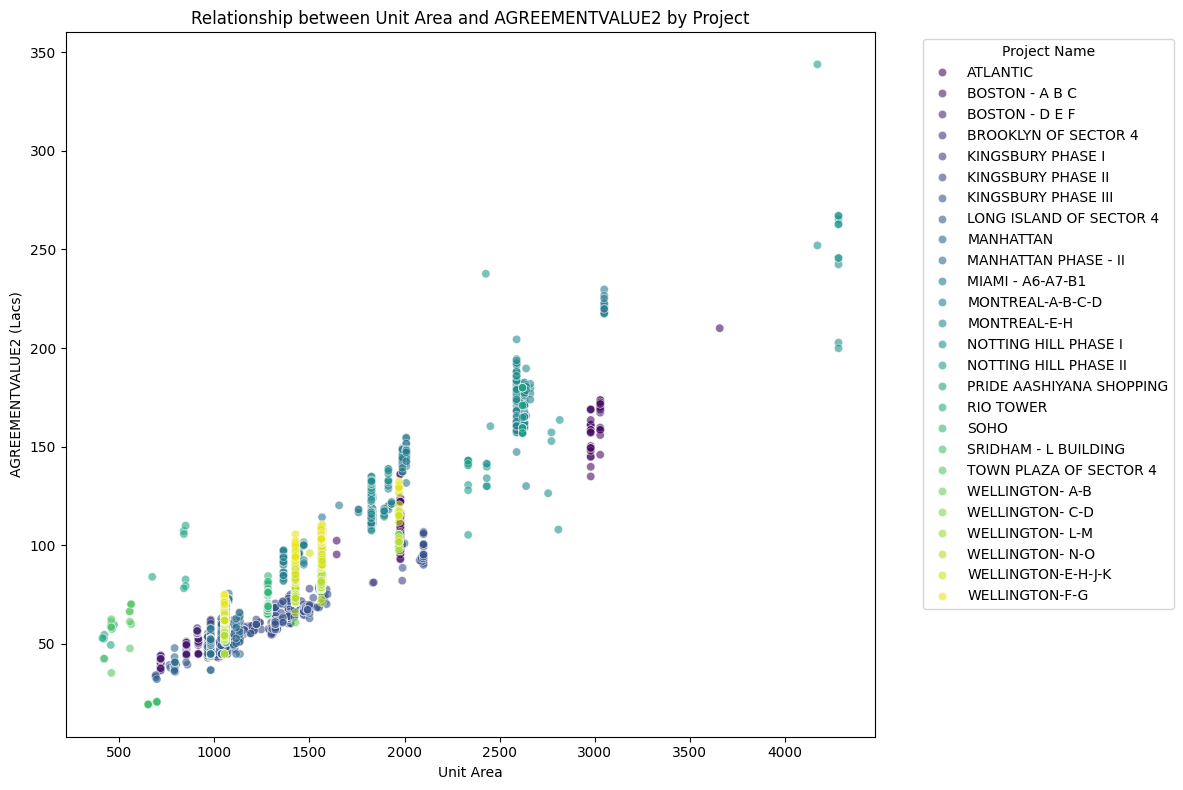

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar plot for unit count per PROJECTNAME
plt.figure(figsize=(12, 6))
sns.countplot(data=df_dashboard, x='PROJECTNAME')
plt.xlabel('Project Name')
plt.ylabel('Number of Units')
plt.title('Number of Units per Project')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Histogram for UNITAREA distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_dashboard, x='UNITAREA', kde=True)
plt.xlabel('Unit Area')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Area')
plt.tight_layout()
plt.show()

# 3. Scatter plot for scaled BASECOST vs scaled AGREEMENTVALUE2
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_dashboard, x='BASECOST_thousands', y='AGREEMENTVALUE2_lacs')
plt.xlabel('BASECOST (Thousands)')
plt.ylabel('AGREEMENTVALUE2 (Lacs)')
plt.title('Relationship between BASECOST and AGREEMENTVALUE2')
plt.tight_layout()
plt.show()

# 4. Box plot for AGREEMENTVALUE2_lacs across different PROJECTNAME
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_dashboard, x='PROJECTNAME', y='AGREEMENTVALUE2_lacs')
plt.xlabel('Project Name')
plt.ylabel('AGREEMENTVALUE2 (Lacs)')
plt.title('Distribution of AGREEMENTVALUE2 by Project')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Scatter plot for UNITAREA vs AGREEMENTVALUE2_lacs colored by PROJECTNAME
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_dashboard, x='UNITAREA', y='AGREEMENTVALUE2_lacs', hue='PROJECTNAME', palette='viridis', alpha=0.6)
plt.xlabel('Unit Area')
plt.ylabel('AGREEMENTVALUE2 (Lacs)')
plt.title('Relationship between Unit Area and AGREEMENTVALUE2 by Project')
plt.legend(title='Project Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Data preparation

### Subtask:
Ensure the data is in the correct format for plotting, including handling any missing values or converting data types as needed. This might involve grouping and aggregating data by project, unit type, or area.

**Reasoning**:
Create a new dataframe with the specified columns and handle missing values and scaling as requested by the instructions.

In [ ]:
# Create a new DataFrame with selected columns
df_dashboard = df[['PROJECTNAME', 'UNITNO', 'UNITAREA', 'GARDENAREA', 'TERRACEAREA', 'AGREEMENTVALUE2', 'BASECOST']].copy()

# Handle missing values (fill with 0 for numerical columns, 'Unknown' for object columns)
for col in ['UNITAREA', 'GARDENAREA', 'TERRACEAREA', 'AGREEMENTVALUE2', 'BASECOST']:
    df_dashboard[col] = df_dashboard[col].fillna(0)

for col in ['PROJECTNAME', 'UNITNO']:
     df_dashboard[col] = df_dashboard[col].fillna('Unknown')

# Scale BASECOST to thousands
df_dashboard['BASECOST_thousands'] = df_dashboard['BASECOST'] / 1000

# Scale AGREEMENTVALUE2 to lacs
df_dashboard['AGREEMENTVALUE2_lacs'] = df_dashboard['AGREEMENTVALUE2'] / 100000

# Display the first few rows and info of the new dataframe
display(df_dashboard.head())
df_dashboard.info()

,PROJECTNAME,UNITNO,UNITAREA,GARDENAREA,TERRACEAREA,AGREEMENTVALUE2,BASECOST,BASECOST_thousands,AGREEMENTVALUE2_lacs
0,ATLANTIC,A 202,1978.0,0.0,0.0,13607000.0,12857000.0,12857.0,136.0700
1,ATLANTIC,A 201,1978.0,0.0,0.0,11354000.0,10854000.0,10854.0,113.5400
2,ATLANTIC,A 902,1978.0,0.0,0.0,10676810.0,10087800.0,10087.8,106.7681
3,ATLANTIC,A 103,3030.0,0.0,0.0,17365000.0,16665000.0,16665.0,173.6500
4,ATLANTIC,A 602,1978.0,0.0,0.0,11044940.0,10285600.0,10285.6,110.4494


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626 entries, 0 to 5625
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROJECTNAME           5626 non-null   object 
 1   UNITNO                5626 non-null   object 
 2   UNITAREA              5626 non-null   float64
 3   GARDENAREA            5626 non-null   float64
 4   TERRACEAREA           5626 non-null   float64
 5   AGREEMENTVALUE2       5626 non-null   float64
 6   BASECOST              5626 non-null   float64
 7   BASECOST_thousands    5626 non-null   float64
 8   AGREEMENTVALUE2_lacs  5626 non-null   float64
dtypes: float64(7), object(2)
memory usage: 395.7+ KB


## Identify key metrics and dimensions

### Subtask:
Determine the specific metrics (e.g., AGREEMENTVALUE2, BASECOST, UNITAREA) and dimensions (PROJECTNAME, UNITNO/type, area features) to include in the dashboards.

**Reasoning**:
Identify the columns required for the dashboards and confirm their presence and data types in the dataframe.

In [ ]:
# Metrics: AGREEMENTVALUE2, BASECOST, UNITAREA
# Dimensions: PROJECTNAME, UNITNO, UNITAREA, GARDENAREA, TERRACEAREA

# Check if these columns exist in the dataframe
required_columns = ['AGREEMENTVALUE2', 'BASECOST', 'UNITAREA', 'PROJECTNAME',
                    'UNITNO', 'GARDENAREA', 'TERRACEAREA']

for col in required_columns:
    if col in df.columns:
        print(f"Column '{col}' exists in the dataframe.")
    else:
        print(f"Column '{col}' does not exist in the dataframe.")

# Print data types of the identified columns
print("\nData types of required columns:")
print(df[required_columns].dtypes)

Column 'AGREEMENTVALUE2' exists in the dataframe.
Column 'BASECOST' exists in the dataframe.
Column 'UNITAREA' exists in the dataframe.
Column 'PROJECTNAME' exists in the dataframe.
Column 'UNITNO' exists in the dataframe.
Column 'GARDENAREA' exists in the dataframe.
Column 'TERRACEAREA' exists in the dataframe.

Data types of required columns:
AGREEMENTVALUE2    float64
BASECOST           float64
UNITAREA           float64
PROJECTNAME         object
UNITNO              object
GARDENAREA         float64
TERRACEAREA        float64
dtype: object


In [4]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.8 MB/s eta 0:00:00


In [ ]:
# Metrics: AGREEMENTVALUE2, BASECOST, UNITAREA
# Dimensions: PROJECTNAME, UNITNO, UNITAREA, GARDENAREA, TERRACEAREA

# Check if these columns exist in the dataframe
required_columns = ['AGREEMENTVALUE2', 'BASECOST', 'UNITAREA', 'PROJECTNAME',
                    'UNITNO', 'GARDENAREA', 'TERRACEAREA']

for col in required_columns:
    if col in df.columns:
        print(f"Column '{col}' exists in the dataframe.")
    else:
        print(f"Column '{col}' does not exist in the dataframe.")

# Print data types of the identified columns
print("\nData types of required columns:")
print(df[required_columns].dtypes)

Column 'AGREEMENTVALUE2' exists in the dataframe.
Column 'BASECOST' exists in the dataframe.
Column 'UNITAREA' exists in the dataframe.
Column 'PROJECTNAME' exists in the dataframe.
Column 'UNITNO' exists in the dataframe.
Column 'GARDENAREA' exists in the dataframe.
Column 'TERRACEAREA' exists in the dataframe.

Data types of required columns:
AGREEMENTVALUE2    float64
BASECOST           float64
UNITAREA           float64
PROJECTNAME         object
UNITNO              object
GARDENAREA         float64
TERRACEAREA        float64
dtype: object


## Data preparation

### Subtask:
Ensure the data is in the correct format for plotting, including handling any missing values or converting data types as needed. This might involve grouping and aggregating data by project, unit type, or area.


**Reasoning**:
Create a new dataframe with the specified columns and handle missing values and scaling as requested by the instructions.



In [ ]:
# Create a new DataFrame with selected columns
df_dashboard = df[['PROJECTNAME', 'UNITNO', 'UNITAREA', 'GARDENAREA', 'TERRACEAREA', 'AGREEMENTVALUE2', 'BASECOST']].copy()

# Handle missing values (fill with 0 for numerical columns, 'Unknown' for object columns)
for col in ['UNITAREA', 'GARDENAREA', 'TERRACEAREA', 'AGREEMENTVALUE2', 'BASECOST']:
    df_dashboard[col] = df_dashboard[col].fillna(0)

for col in ['PROJECTNAME', 'UNITNO']:
     df_dashboard[col] = df_dashboard[col].fillna('Unknown')

# Scale BASECOST to thousands
df_dashboard['BASECOST_thousands'] = df_dashboard['BASECOST'] / 1000

# Scale AGREEMENTVALUE2 to lacs
df_dashboard['AGREEMENTVALUE2_lacs'] = df_dashboard['AGREEMENTVALUE2'] / 100000

# Display the first few rows and info of the new dataframe
display(df_dashboard.head())
df_dashboard.info()

,PROJECTNAME,UNITNO,UNITAREA,GARDENAREA,TERRACEAREA,AGREEMENTVALUE2,BASECOST,BASECOST_thousands,AGREEMENTVALUE2_lacs
0,ATLANTIC,A 202,1978.0,0.0,0.0,13607000.0,12857000.0,12857.0,136.0700
1,ATLANTIC,A 201,1978.0,0.0,0.0,11354000.0,10854000.0,10854.0,113.5400
2,ATLANTIC,A 902,1978.0,0.0,0.0,10676810.0,10087800.0,10087.8,106.7681
3,ATLANTIC,A 103,3030.0,0.0,0.0,17365000.0,16665000.0,16665.0,173.6500
4,ATLANTIC,A 602,1978.0,0.0,0.0,11044940.0,10285600.0,10285.6,110.4494


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626 entries, 0 to 5625
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROJECTNAME           5626 non-null   object 
 1   UNITNO                5626 non-null   object 
 2   UNITAREA              5626 non-null   float64
 3   GARDENAREA            5626 non-null   float64
 4   TERRACEAREA           5626 non-null   float64
 5   AGREEMENTVALUE2       5626 non-null   float64
 6   BASECOST              5626 non-null   float64
 7   BASECOST_thousands    5626 non-null   float64
 8   AGREEMENTVALUE2_lacs  5626 non-null   float64
dtypes: float64(7), object(2)
memory usage: 395.7+ KB


## Create visualizations

### Subtask:
Generate a series of plots to show trends and relationships for the selected metrics and dimensions. This could include:
- Bar plots or count plots for categorical variables (PROJECTNAME, UNITNO/type).
- Histograms or box plots for numerical variables (area features, AGREEMENTVALUE2, BASECOST).
- Scatter plots or line plots to show relationships and trends over time or between variables, potentially faceted by project or unit type.


## Arrange visualizations into dashboards

### Subtask:
Combine the individual plots into a dashboard layout using appropriate visualization libraries or tools (although directly creating interactive dashboards in Colab can be limited, we can generate the code for multiple static plots).

**Reasoning**:
Group the previously generated plots into logical dashboards using subplots, adding titles for each dashboard and individual plots, and then display each dashboard.

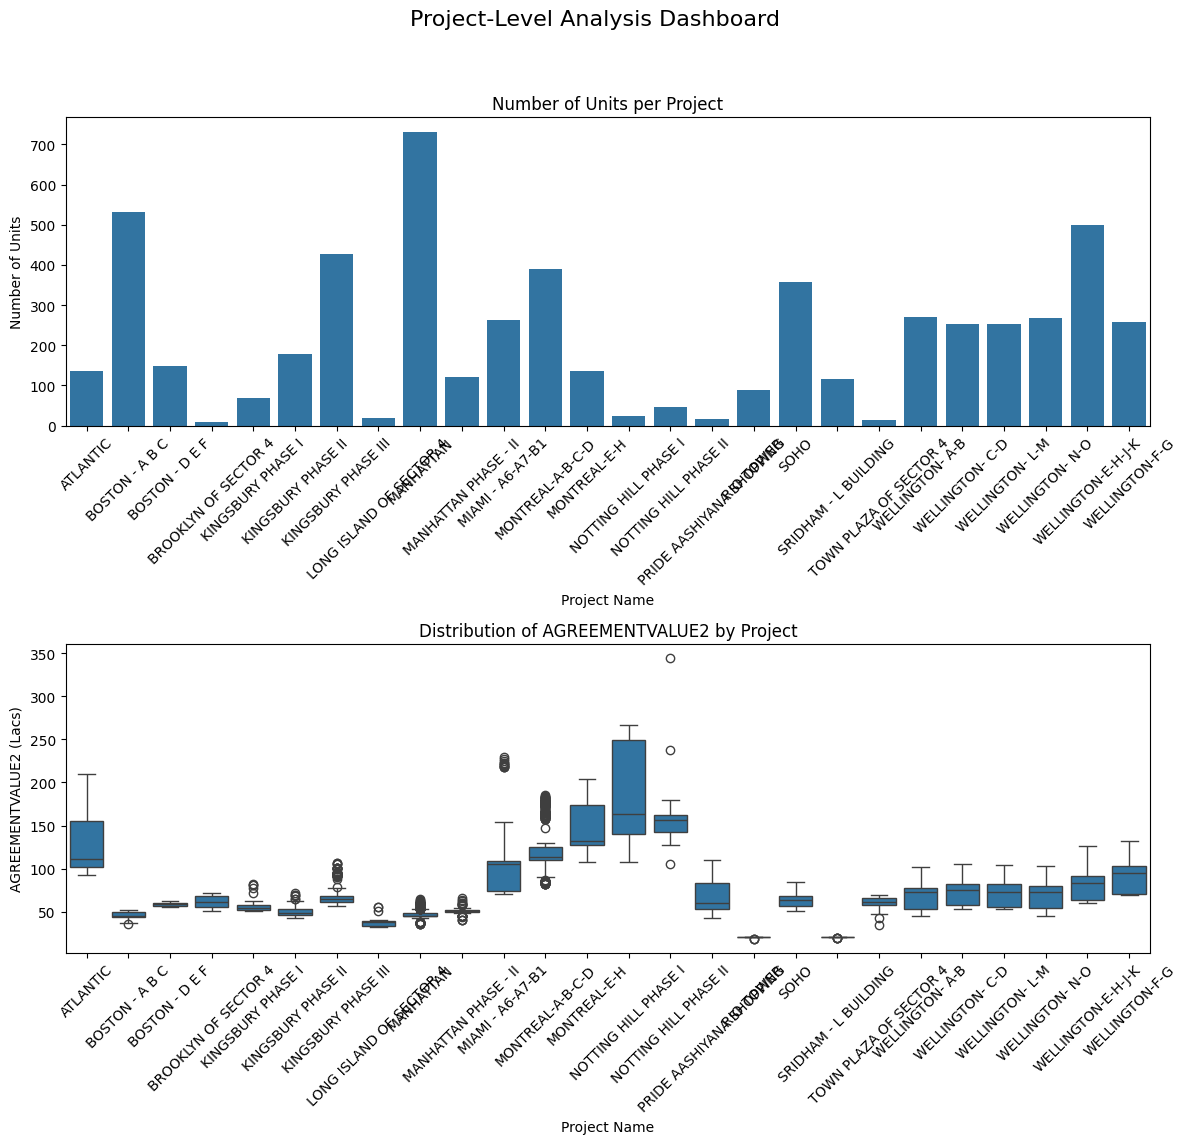

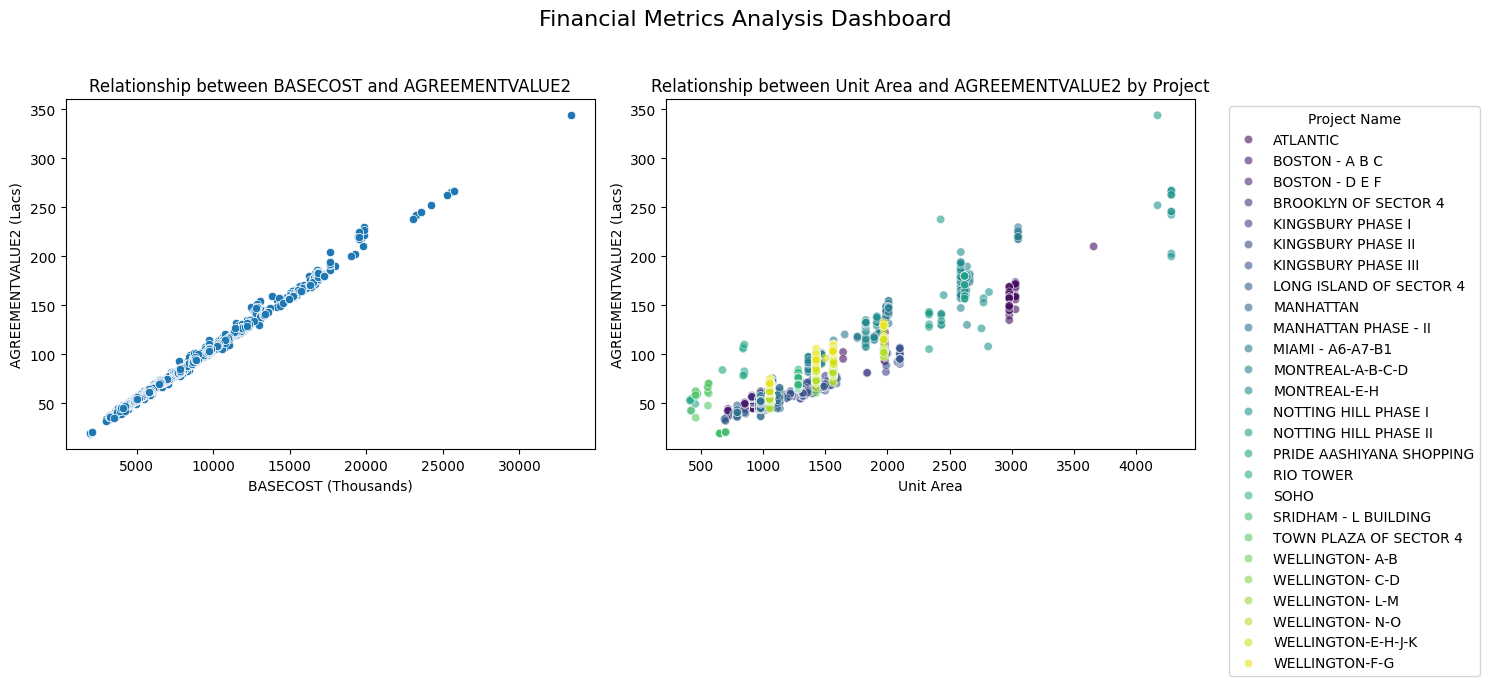

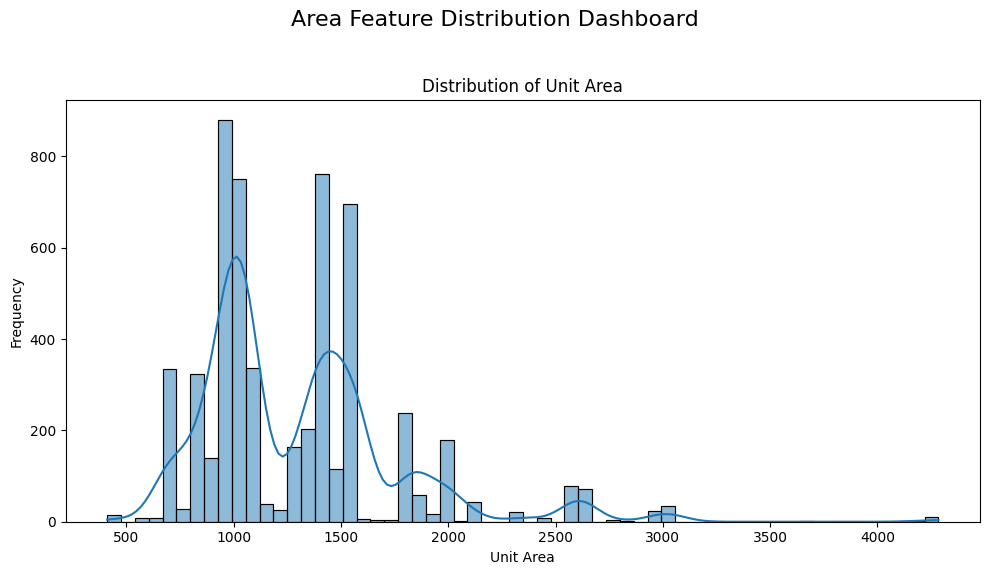

In [ ]:
# Conceptual Dashboard 1: Project-Level Analysis
fig1, axes1 = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
fig1.suptitle('Project-Level Analysis Dashboard', fontsize=16)

# Plot 1: Bar plot for unit count per PROJECTNAME
sns.countplot(data=df_dashboard, x='PROJECTNAME', ax=axes1[0])
axes1[0].set_xlabel('Project Name')
axes1[0].set_ylabel('Number of Units')
axes1[0].set_title('Number of Units per Project')
axes1[0].tick_params(axis='x', rotation=45)


# Plot 4: Box plot for AGREEMENTVALUE2_lacs across different PROJECTNAME
sns.boxplot(data=df_dashboard, x='PROJECTNAME', y='AGREEMENTVALUE2_lacs', ax=axes1[1])
axes1[1].set_xlabel('Project Name')
axes1[1].set_ylabel('AGREEMENTVALUE2 (Lacs)')
axes1[1].set_title('Distribution of AGREEMENTVALUE2 by Project')
axes1[1].tick_params(axis='x', rotation=45)


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

# Conceptual Dashboard 2: Financial Metrics Analysis
fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig2.suptitle('Financial Metrics Analysis Dashboard', fontsize=16)

# Plot 3: Scatter plot for scaled BASECOST vs scaled AGREEMENTVALUE2
sns.scatterplot(data=df_dashboard, x='BASECOST_thousands', y='AGREEMENTVALUE2_lacs', ax=axes2[0])
axes2[0].set_xlabel('BASECOST (Thousands)')
axes2[0].set_ylabel('AGREEMENTVALUE2 (Lacs)')
axes2[0].set_title('Relationship between BASECOST and AGREEMENTVALUE2')

# Plot 5: Scatter plot for UNITAREA vs AGREEMENTVALUE2_lacs colored by PROJECTNAME
sns.scatterplot(data=df_dashboard, x='UNITAREA', y='AGREEMENTVALUE2_lacs', hue='PROJECTNAME', palette='viridis', alpha=0.6, ax=axes2[1])
axes2[1].set_xlabel('Unit Area')
axes2[1].set_ylabel('AGREEMENTVALUE2 (Lacs)')
axes2[1].set_title('Relationship between Unit Area and AGREEMENTVALUE2 by Project')
axes2[1].legend(title='Project Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

# Conceptual Dashboard 3: Area Feature Distribution
fig3, axes3 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
fig3.suptitle('Area Feature Distribution Dashboard', fontsize=16)

# Plot 2: Histogram for UNITAREA distribution
sns.histplot(data=df_dashboard, x='UNITAREA', kde=True, ax=axes3)
axes3.set_xlabel('Unit Area')
axes3.set_ylabel('Frequency')
axes3.set_title('Distribution of Unit Area')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

In [9]:
pip install joblib


In [11]:
from google.colab import files
uploaded = files.upload()

Saving Pune_price_model.pkl to Pune_price_model.pkl


In [12]:
import streamlit as st
import pandas as pd
import joblib

# Load model
model = joblib.load('Pune_price_model.pkl')

st.title("🏠 Property Price Predictor")

# User inputs
unitarea = st.number_input("Unit Area (sqft)", min_value=100)
gardenarea = st.number_input("Garden Area", min_value=0)
terracearea = st.number_input("Terrace Area", min_value=0)
baserate = st.number_input("Base Rate", min_value=1000)
basecost = st.number_input("Base Cost", min_value=100000)
othercharges = st.number_input("Other Charges", min_value=0)
agent = st.text_input("Agent Name")
accountsource = st.text_input("Account Source")
bookingthrough = st.text_input("Booking Through")

# Predict
if st.button("Predict Price"):
    input_df = pd.DataFrame([{
        'UNITAREA': unitarea,
        'GARDENAREA': gardenarea,
        'TERRACEAREA': terracearea,
        'BASERATE': baserate,
        'BASECOST': basecost,
        'OTHERCHARGES': othercharges,
        'AGENT': agent,
        'ACCOUNTSOURCE': accountsource,
        'BOOKINGTHROUGH': bookingthrough
    }])
    price = model.predict(input_df)[0]
    st.success(f"Estimated Agreement Value: ₹{price:,.2f}")


2025-09-19 10:59:17.206 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 10:59:17.398 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-09-19 10:59:17.398 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 10:59:17.400 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 10:59:17.401 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 10:59:17.402 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 10:59:17.403 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 10:59:17.404 Thread 'MainThread': mi